| Project name  |  Kubernetes |
|:----------|:-------------|
| **Autor(S)**| 33273 Melany Palomares, <br> 33225 Gustavo Lopez|
| **Last update** |1-12-22 |

### <span style="color:blue">Problem statement</span>

Implement a software that helps send and receibe messages(numbers, sentences, etc.) via Wi-Fi, with the implementation of kubernetes, in the current school system.

In this project it will be implemented in Kubernetes servers because it can allow us to accredit what we need in this project.

Kubernetes is a modern application that allows us to use containers, it allows us to create packaged microservices with their dependencies and configurations, since Kubernetes is an open source software that implements and manages containers.

The project uses FreeRTOS CMSIS Ver. 2. The scheduling policy is Rate Monotonic (RM) with time triggering.  



### <span style="color:blue">Hardware Requirements</span>
|Component|Quantity|Characteristics|
|:---|:---|:---:|
|STM32F767ZIT|1| Development board|
|ESP 32 |1| Wi-Fi microship with built-in TCP/IP networking software. |
|Micro USB cable| 1| Connects STM32F767ZIT board to computer so it can get updated.|
|Protoboard|1|Connects the STM32F767ZIT board to the ESP 32|

##CubeMX parameters##

|Class|Attribute|Value|
|:---|:---|:---:|
|Project|Name|F767ZIV2_DataMarshalling|
| | Clock| 16 Mhz|
||Timebase Source|Tim1|
|STM32 Pins|PD6, PD5|Set PD6 to USART2_RX <br> Set PD5 to USART2_TX|
|FREERTOS|API|CMSIS V2|
|Task/Interrupt|Type|Name|Entry Function|Priority|
|1|Default|Instrumentation Task|instTask|osPriorityNormal|
|2|Default|Disemination Task|mqqtClientTask|osPriorityNormal|

**Conceptual Static Model**

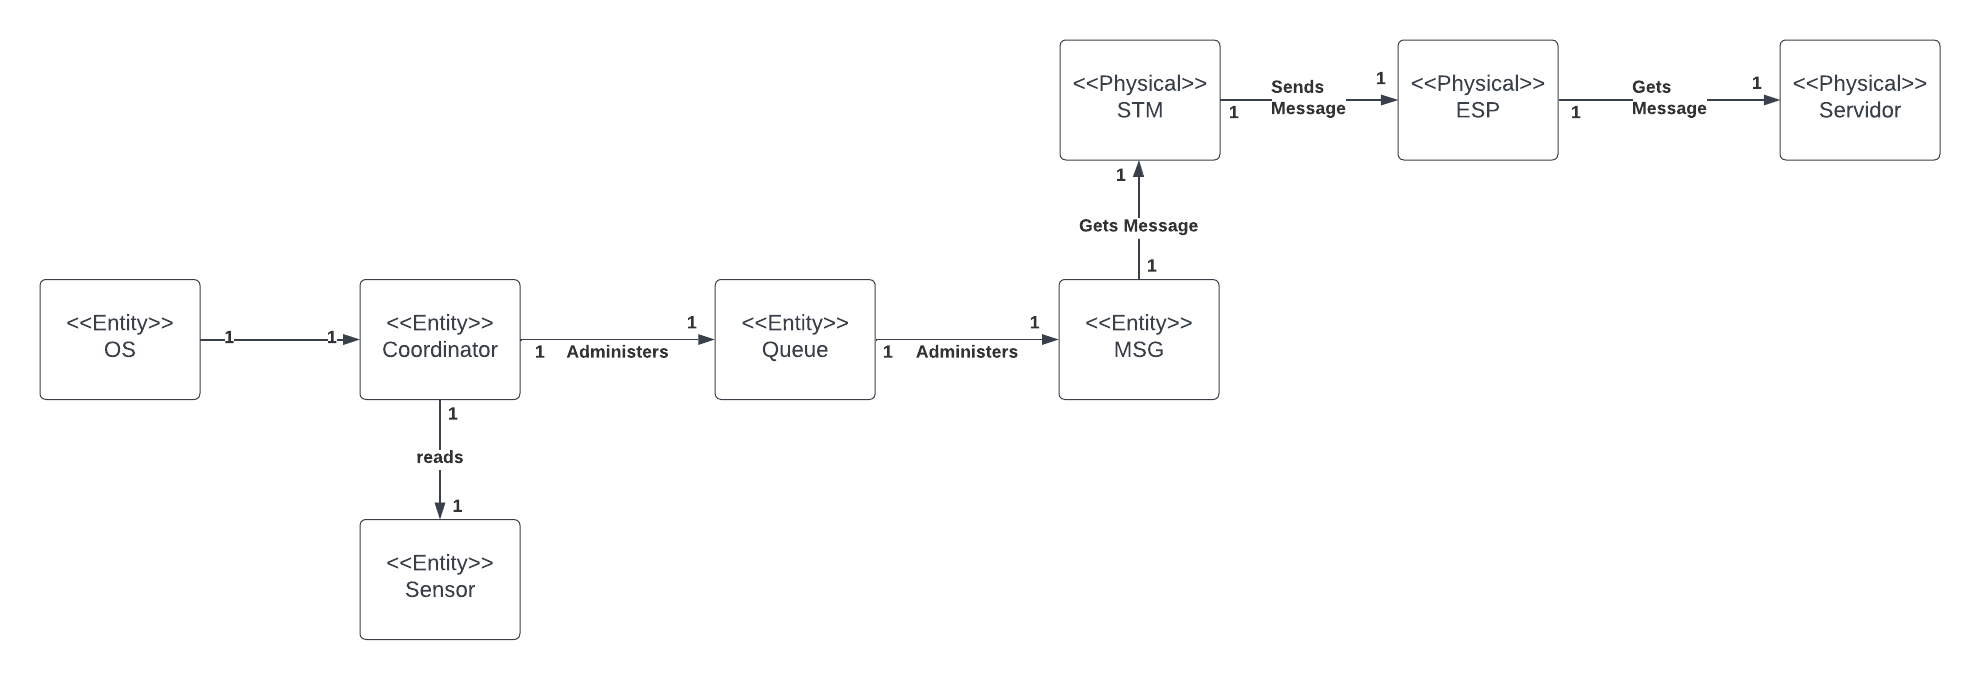

**Communication Diagram**

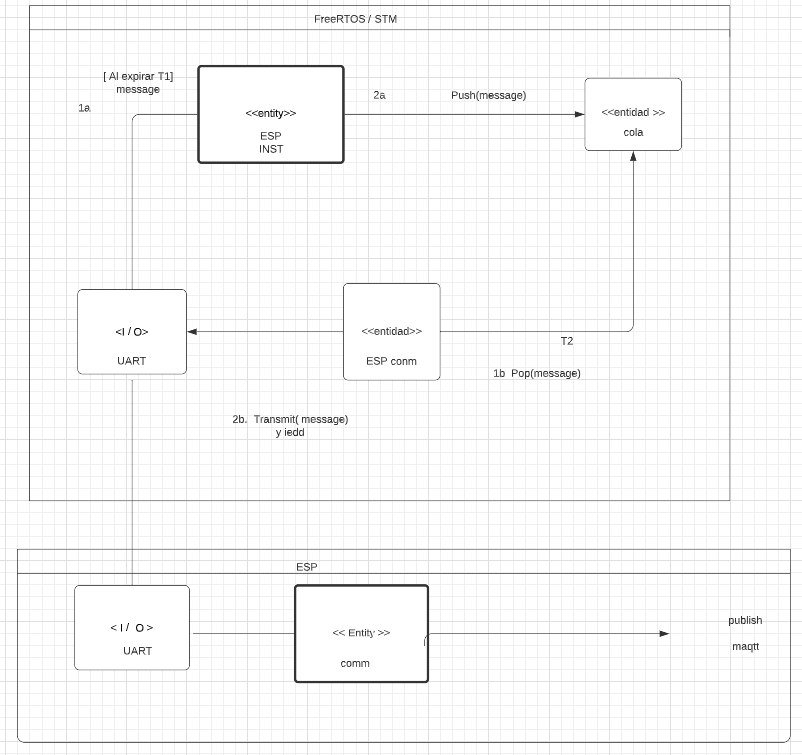

#Software Components##

##First Step
###Loading Libraries

We start by loading all necesary libraries for the project at hand. We will import these libraries for future functions that may be in their contents:

In [ ]:
import network
import time
from machine import UART
from machine import Timer
import urequests as requests

##Second Step
###Declaring the WiFi conncection function

We will be using this function to connect our device to the WiFi. In this function we enter the name and password of our internet manually in the code, like so:

In [ ]:
def connect():
    sta_if = network.WLAN(network.STA_IF)
    sta_if.active(True)
    sta_if.connect('<your device name>', '<your password>')
    for i in range(15):
        print(".")
        if sta_if.isconnected():
            break
        time.sleep(1)
    if sta_if.isconnected():
        print("Connection successful")
        print(sta_if.ifconfig())
    else:
        print("Connection could not be made.\n")

##Step Three
###Declaring the object named UART

This object we will use to establish a communication between the devices using their UART ports.

In [ ]:
class Buffered_UART:
    def __init__(self, uid, baudrate=115200):
        self.uart_port = UART(uid, baudrate)

    # Gets sz bytes from the UART port
    def poll(self, sz=-1):
        if(sz == -1):
            return self.uart_port.read()
        else: 
            return self.uart_port.read(sz)


##Step Four
###Declaring the message queue

We declare the message queue so that our sent messages will get stored in this queue for temporary storage, so that another function will read the message queue and send it more easily.

In [ ]:
class deque:

    def __init__(self, iterable=None):
        if iterable is None:
            self.q = []
        else:
            self.q = list(iterable)

    def popleft(self):
        return self.q.pop(0)

    def popright(self):
        return self.q.pop()

    def pop(self):
        return self.q.pop()

    def append(self, a):
        self.q.append(a)

    def appendleft(self, a):
        self.q.insert(0, a)

    def extend(self, a):
        self.q.extend(a)

    def __len__(self):
        return len(self.q)

    def __bool__(self):
        return bool(self.q)

    def __iter__(self):
        yield from self.q

    def __str__(self):
        return 'deque({})'.format(self.q)
	
	def size(self):
        return self.uart_port.any()

##Step Five
###Declaring the instrumentation function

We will use this function to get the messages, partition them into the correct format, and to send the messages in the message queue.

In [ ]:
def instTask(self):
    if(uart_end_pnt.size() > 0): 
        # 1. receive the message
        msg = uart_end_pnt.poll().decode('ascii')
        # msg = uart_end_pnt.poll().decode("utf-8")

        # 2. remove control characters (No need)
        # msg = msg.replace('\x00','')

        # 3. partition into fixed size strings
        msgs = [msg[i:i+n] for i in range(0, len(msg), n)]

        # 3. push each extracted string in a buffered queue
        for msg in msgs:
            msg_queue.append(msg)

##Step Six
###Declaring the function that sends the message to the webpage

Just as it says in the title, we create a function that uses a couple of libraries, to send our message in the format we need it to be, so that the webpage can read the data correctly and anyone with the link can visualize it as it is getting updated.

In [ ]:
def push_msg(values, write_key = "RMJ59JZ6SKP3SKR0"):
    import urequests as requests
    fields = [['field' + str(n+1), values[n]] for n in range(0,len(values))]
    suffix =""
    for field in fields:
        suffix = "%s&%s" % (suffix, str(field[0]) + "=" + str(field[1]))
    hppt_request = "https://api.thingspeak.com/update?api_key=" + write_key + suffix
    res = requests.post(hppt_request)
    return res.text

##Step Seven
###Declaring the message disemination function

With this function we get the value of our number in the queue, and we call the previous function so we can send that exact value in the correct format so that it will be correctly read by the webpage.

In [ ]:
def mqqtClientTask(self):
    v = int(msg_queue.popleft())
    values = [v,v]
    push_msg(values)

##Step Eight
###Main Algorithm



We first call the "connect()" function, so we connect our device to the WiFi.

In [ ]:
connect()

Then we create the conection UART using the second port(UART2)

In [ ]:
uart_end_pnt = Buffered_UART(2)

Then we procede to define the size of our message

In [ ]:
n = 5

Next we create de message queue

In [ ]:
msg_queue = deque()

And finally we declare and execute the timers of both our instrumentation task and our message disemination task

In [ ]:
instTaskTimer = Timer(0)
instTaskTimer.init(period=3000, mode=Timer.PERIODIC, callback=instTask)
commTaskTimer = Timer(1)
commTaskTimer.init(period=3000, mode=Timer.PERIODIC, callback=mqqtClientTask)